In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler


In [38]:
data = pd.read_csv("StudentsPerformance.csv")
data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [39]:
data.isnull().any().sum()

np.int64(0)

In [40]:
data.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

In [ ]:
# Step1: Scan all variables for missing values and inconsistencies. If
# there are missing values and/or inconsistencies, use any of
# the suitable techniques to deal with them.

# Filling missing numeric values with median
nums_col = data.select_dtypes(include=['int64', 'float64']).columns
for col in nums_col:
    data[col] = data[col].fillna(data[col].median())

In [42]:
# Filling missing categorical values with mode
cat_cols = data.select_dtypes(include='object').columns
for col in cat_cols:
    data[col] = data[col].fillna(data[col].mode()[0])

In [43]:
for col in cat_cols:
    print(f"Unique values in {col}:\n", data[col].unique())

Unique values in gender:
 ['female' 'male']
Unique values in race/ethnicity:
 ['group B' 'group C' 'group A' 'group D' 'group E']
Unique values in parental level of education:
 ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Unique values in lunch:
 ['standard' 'free/reduced']
Unique values in test preparation course:
 ['none' 'completed']


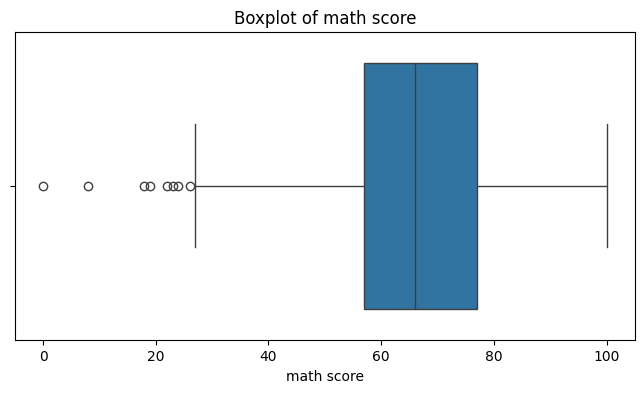

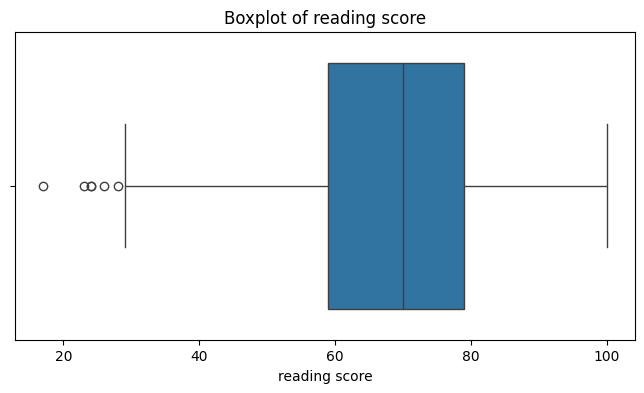

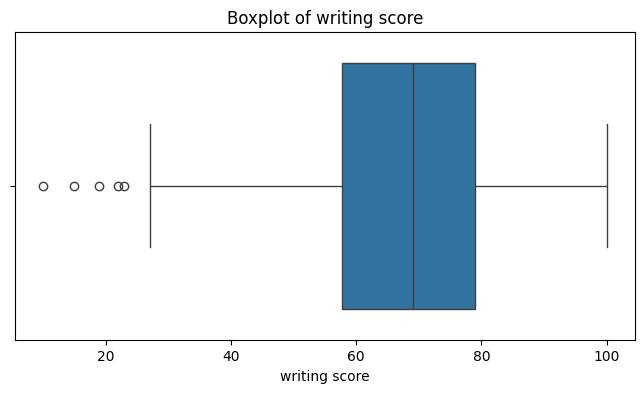

In [44]:
#Step2: Look for outliers and Handle them

for col in nums_col:
    plt.figure(figsize=(8,4))
    sns.boxplot(x=data[col])
    plt.title(f"Boxplot of {col}")
    plt.show


#Blue Box = Middle 50 percent of values
#Vertical lines are the lower and upper bound
# Hollow circles are the outliers

In [ ]:
# Use IQR method to cap all the values outside the lower and upper bound

for col in nums_col:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR

    #Capping process
    data[col] = np.where(data[col] < lower, lower, np.where(data[col] > upper, upper, data[col]))

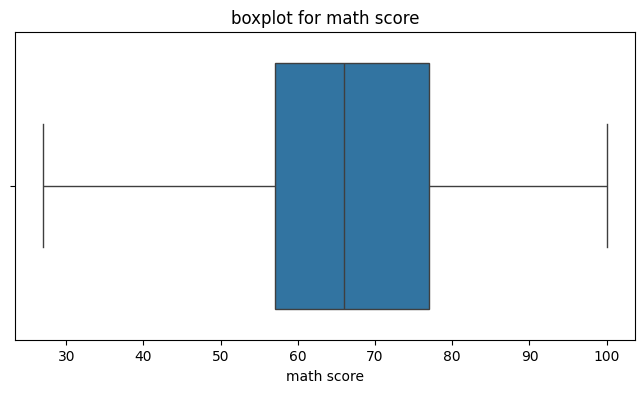

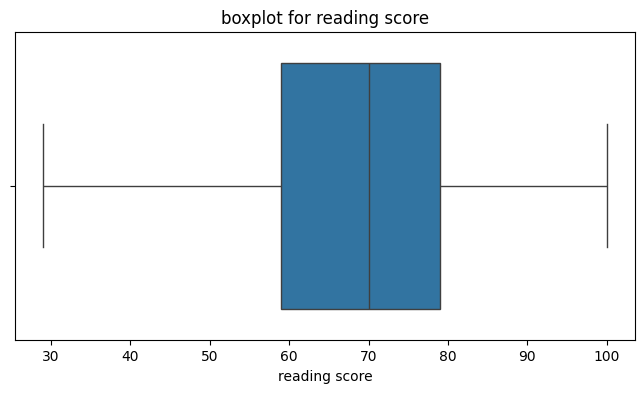

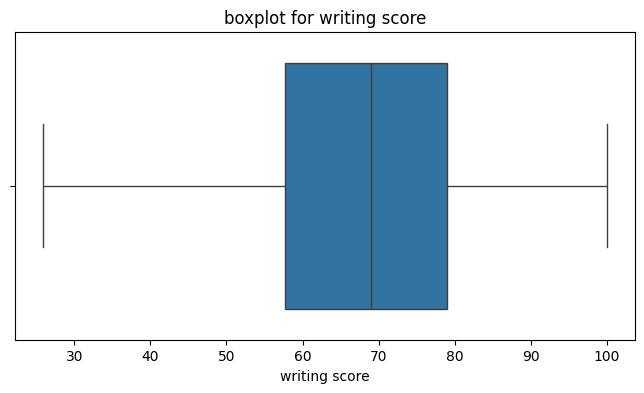

In [46]:
#Look how we capped all the outliers

for col in nums_col:
    plt.figure(figsize=(8,4))
    sns.boxplot(x=data[col])
    plt.title(f"boxplot for {col}")
    plt.show()

np.float64(-0.22370073821656367)

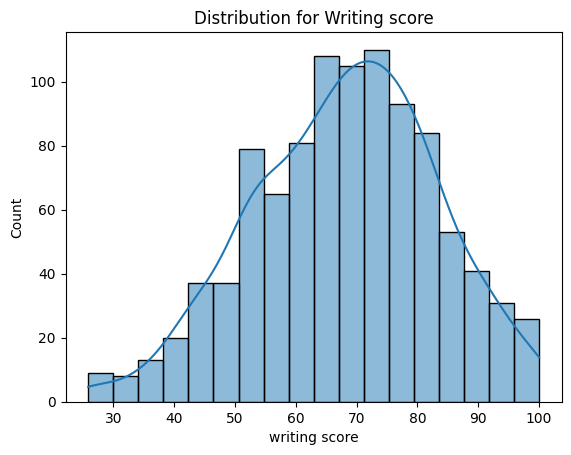

In [47]:
# 3. Data Transformation

#First lets check the skewness 

sns.histplot(data['writing score'], kde=True)
plt.title(f"Distribution for Writing score")
data['writing score'].skew()

In [48]:
# Apply MinMax Scaling Transformation technique

cols_to_drop = ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']

score_data = data.drop(columns=[col for col in cols_to_drop if col in data.columns])

score_data.head()

,math score,reading score,writing score
0,72.0,72.0,74.0
1,69.0,90.0,88.0
2,90.0,95.0,93.0
3,47.0,57.0,44.0
4,76.0,78.0,75.0


In [53]:
scaler = MinMaxScaler()
score_data = scaler.fit_transform(score_data)

#this returs a numpy 
# so again convert it to a pandas dataframe

score_data = pd.DataFrame(
    score_data,
    columns=['math score (scaled)', 'reading score (scaled)', 'writing score (scaled)'],
    index=data.index
)

In [54]:
score_data.head()

,math score (scaled),reading score (scaled),writing score (scaled)
0,0.616438,0.605634,0.649241
1,0.575342,0.859155,0.838111
2,0.863014,0.929577,0.905565
3,0.273973,0.394366,0.244519
4,0.671233,0.690141,0.662732


In [51]:
dfs = [data, score_data]
new_data = pd.concat(dfs, axis=1)
new_data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,math score (scaled),reading score (scaled),writing score (scaled)
0,female,group B,bachelor's degree,standard,none,72.0,72.0,74.0,0.616438,0.605634,0.649241
1,female,group C,some college,standard,completed,69.0,90.0,88.0,0.575342,0.859155,0.838111
2,female,group B,master's degree,standard,none,90.0,95.0,93.0,0.863014,0.929577,0.905565
3,male,group A,associate's degree,free/reduced,none,47.0,57.0,44.0,0.273973,0.394366,0.244519
4,male,group C,some college,standard,none,76.0,78.0,75.0,0.671233,0.690141,0.662732
...,...,...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88.0,99.0,95.0,0.835616,0.985915,0.932546
996,male,group C,high school,free/reduced,none,62.0,55.0,55.0,0.479452,0.366197,0.392917
997,female,group C,high school,free/reduced,completed,59.0,71.0,65.0,0.438356,0.591549,0.527825
998,female,group D,some college,standard,completed,68.0,78.0,77.0,0.561644,0.690141,0.689713
